<a href="https://colab.research.google.com/github/ganeshhegde1975/Deep-Learning/blob/master/Project1/Assignment_EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

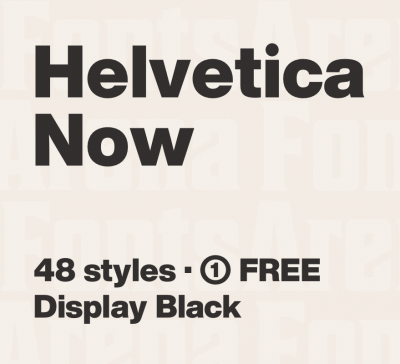

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# Edge Detection

In [0]:
edges = cv2.Canny(image,100,200)

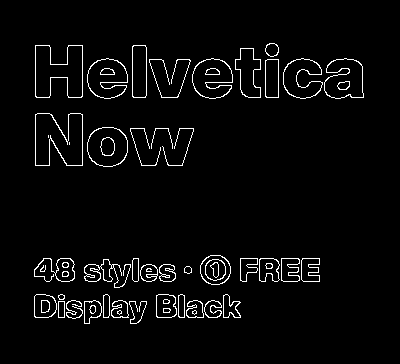

In [0]:
cv2_imshow(edges)

#**Vertical Edge Detection**


A 3*3 kernel  [-1,0,1][-1,0,1][-1,0,1] applied over the font image detects transitions in pixel colors black->white. 
 
                       






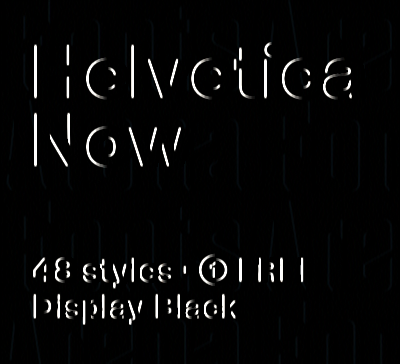

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

#**Horizontal Edge Detection**


A 3*3 kernel  [1,1,1][0,0,0][-1,-1,1] applied over the font image detects transitions in pixel colors black->white. 
 
                       






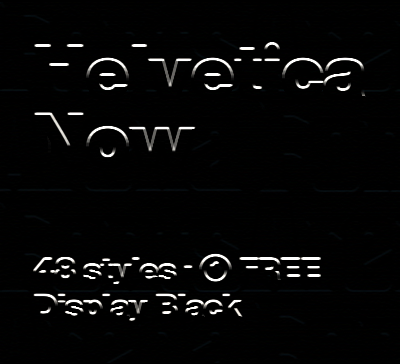

In [0]:
kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

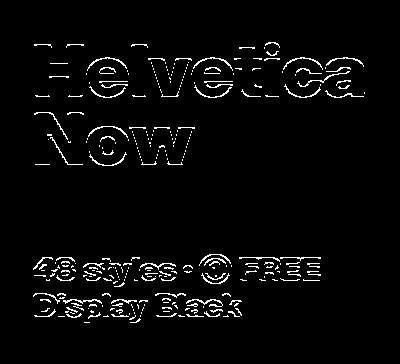

In [0]:
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)

#45 degree angle detector (+45 degree)

The kernel should be aligned in same direction and
Sum of kernel elements must be 0, else it will whiten/darken the image
so we make diagonal of 0s n top left as 1, bottom right as -1

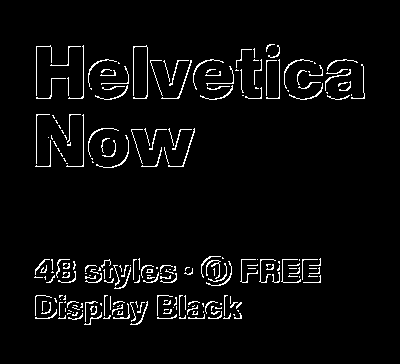

In [0]:
kernel = np.float32([[1,1,0],[1,0,-1],[0,-1,-1]])

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)

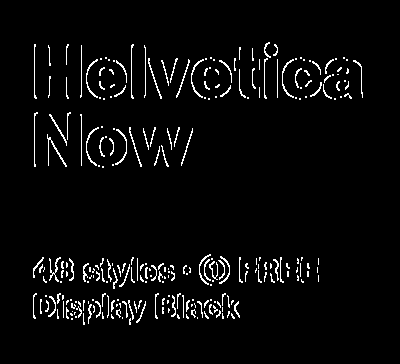

In [0]:
kernel = np.float32([[-1,0,1],[-2,0,2],[-1,0,1]])

dst = cv2.filter2D(edges,-1,kernel)
Zcv2_imshow(dst)

#Blur Kernel
A kernel with all ones and averaged out will make the intensity of the pixels lesser.


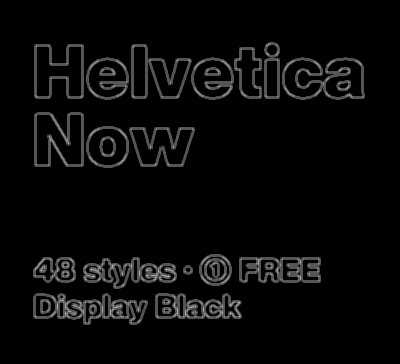

In [0]:
kernel = np.float32([[1,1,1],[1,1,1],[1,1,1]])/9

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)

#Sharpen Kernel
A kernel with all ones and multiplied out will make the intensity of the pixels sharper and brighter.




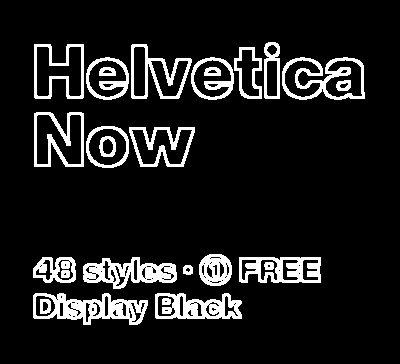

In [0]:
kernel = np.float32([[1,1,1],[1,1,1],[1,1,1]])*9

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)

#Identity Kernel
Make all columns and rows 0 except for the middle that is kept 1. This does not change anything.

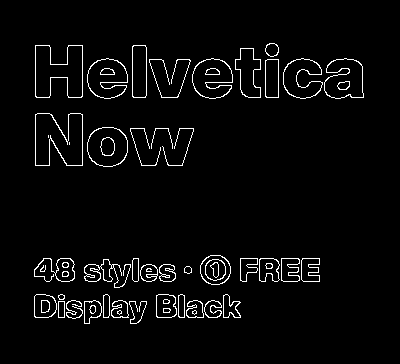

In [0]:
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)